## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
pip install scikit-learn catboost xgboost

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/GDM.csv')

#### Show Top 5 Records

In [4]:
df.head()

Case_Number  Age  No_of_Pregnancy  Gestation_in_previous_Pregnancy  BMI  \
0            1   22                2                                1  NaN   
1            2   26                2                                1  NaN   
2            3   29                1                                0  NaN   
3            4   28                2                                1  NaN   
4            5   21                2                                1  NaN   

    HDL  Family_History  unexplained_prenetal_loss  \
0  55.0               0                          0   
1  53.0               0                          0   
2  50.0               0                          0   
3  51.0               0                          0   
4  52.0               0                          0   

   Large_Child_or_Birth_Default  PCOS  Sys_BP  Dia_BP  OGTT  Hemoglobin  \
0                             0     0   102.0      69   NaN        12.0   
1                             0     0   101.0      63   NaN        12.4   
2                             0     0   118.0      79   NaN        14.3   
3                             0     0    99.0      70   NaN        15.0   
4                             0     0   116.0      65   NaN        15.0   

   Sedentary_Lifestyle  Prediabetes  Result  
0                    0            0       0  
1                    0            0       0  
2                    0            0       0  
3                    0            0       0  
4                    0            0       0

#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['Case_Number','Result'],axis=1)

In [6]:
X.head()

Age  No_of_Pregnancy  Gestation_in_previous_Pregnancy  BMI   HDL  \
0   22                2                                1  NaN  55.0   
1   26                2                                1  NaN  53.0   
2   29                1                                0  NaN  50.0   
3   28                2                                1  NaN  51.0   
4   21                2                                1  NaN  52.0   

   Family_History  unexplained_prenetal_loss  Large_Child_or_Birth_Default  \
0               0                          0                             0   
1               0                          0                             0   
2               0                          0                             0   
3               0                          0                             0   
4               0                          0                             0   

   PCOS  Sys_BP  Dia_BP  OGTT  Hemoglobin  Sedentary_Lifestyle  Prediabetes  
0     0   102.0      69   NaN        12.0                    0            0  
1     0   101.0      63   NaN        12.4                    0            0  
2     0   118.0      79   NaN        14.3                    0            0  
3     0    99.0      70   NaN        15.0                    0            0  
4     0   116.0      65   NaN        15.0                    0            0

In [7]:
y = df['Result']

In [8]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3520    1
3521    1
3522    1
3523    0
3524    0
Name: Result, Length: 3525, dtype: int64

In [9]:
# Creation of Column Transformer with 3 types of transformers if needed

#num_features = X.select_dtypes(exclude="object").columns
#cat_features = X.select_dtypes(include="object").columns

#from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from sklearn.compose import ColumnTransformer

#numeric_transformer = StandardScaler()
#oh_transformer = OneHotEncoder()

#preprocessor = ColumnTransformer(
#    [
#        ("OneHotEncoder", oh_transformer, cat_features),
#         ("StandardScaler", numeric_transformer, num_features),        
#    ]
#)

In [10]:
#X = preprocessor.fit_transform(X)

In [11]:
X.shape

(3525, 15)

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your dataframe

# Impute missing values for numerical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
imputer = SimpleImputer(strategy='mean')
df[numeric_features] = imputer.fit_transform(df[numeric_features])

# Check for NaN values in the entire dataset after imputation
nan_columns_after_imputation = df.columns[df.isna().any()].tolist()
nan_rows_after_imputation = df.index[df.isna().any(axis=1)].tolist()

print("Columns with NaN values after imputation:", nan_columns_after_imputation)
print("Rows with NaN values after imputation:", nan_rows_after_imputation)

# If you want to specifically check columns with initially specified NaN values
columns_with_nan = ['BMI', 'HDL', 'Sys_BP', 'OGTT']
nan_columns_specified_after_imputation = [col for col in columns_with_nan if df[col].isna().any()]
print("Specified columns with NaN values after imputation:", nan_columns_specified_after_imputation)

Columns with NaN values after imputation: []
Rows with NaN values after imputation: []
Specified columns with NaN values after imputation: []


#### Create an Evaluate Function to give all metrics after model Training

In [13]:
#For Regression
#def evaluate_model(true, predicted):
#    mae = mean_absolute_error(true, predicted)
#    mse = mean_squared_error(true, predicted)
#    rmse = np.sqrt(mean_squared_error(true, predicted))
#    r2_square = r2_score(true, predicted)
#    return mae, rmse, r2_square

#For Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    conf_matrix = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, conf_matrix

In [14]:
df.head()

Case_Number   Age  No_of_Pregnancy  Gestation_in_previous_Pregnancy  \
0          1.0  22.0              2.0                              1.0   
1          2.0  26.0              2.0                              1.0   
2          3.0  29.0              1.0                              0.0   
3          4.0  28.0              2.0                              1.0   
4          5.0  21.0              2.0                              1.0   

         BMI   HDL  Family_History  unexplained_prenetal_loss  \
0  27.854092  55.0             0.0                        0.0   
1  27.854092  53.0             0.0                        0.0   
2  27.854092  50.0             0.0                        0.0   
3  27.854092  51.0             0.0                        0.0   
4  27.854092  52.0             0.0                        0.0   

   Large_Child_or_Birth_Default  PCOS  Sys_BP  Dia_BP        OGTT  Hemoglobin  \
0                           0.0   0.0   102.0    69.0  170.707503        12.0   
1                           0.0   0.0   101.0    63.0  170.707503        12.4   
2                           0.0   0.0   118.0    79.0  170.707503        14.3   
3                           0.0   0.0    99.0    70.0  170.707503        15.0   
4                           0.0   0.0   116.0    65.0  170.707503        15.0   

   Sedentary_Lifestyle  Prediabetes  Result  
0                  0.0          0.0     0.0  
1                  0.0          0.0     0.0  
2                  0.0          0.0     0.0  
3                  0.0          0.0     0.0  
4                  0.0          0.0     0.0

In [15]:
y = df['Result']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3520    1.0
3521    1.0
3522    1.0
3523    0.0
3524    0.0
Name: Result, Length: 3525, dtype: float64

In [16]:
X = df.drop(columns=['Case_Number','Result'],axis=1)
X.head()

Age  No_of_Pregnancy  Gestation_in_previous_Pregnancy        BMI   HDL  \
0  22.0              2.0                              1.0  27.854092  55.0   
1  26.0              2.0                              1.0  27.854092  53.0   
2  29.0              1.0                              0.0  27.854092  50.0   
3  28.0              2.0                              1.0  27.854092  51.0   
4  21.0              2.0                              1.0  27.854092  52.0   

   Family_History  unexplained_prenetal_loss  Large_Child_or_Birth_Default  \
0             0.0                        0.0                           0.0   
1             0.0                        0.0                           0.0   
2             0.0                        0.0                           0.0   
3             0.0                        0.0                           0.0   
4             0.0                        0.0                           0.0   

   PCOS  Sys_BP  Dia_BP        OGTT  Hemoglobin  Sedentary_Lifestyle  \
0   0.0   102.0    69.0  170.707503        12.0                  0.0   
1   0.0   101.0    63.0  170.707503        12.4                  0.0   
2   0.0   118.0    79.0  170.707503        14.3                  0.0   
3   0.0    99.0    70.0  170.707503        15.0                  0.0   
4   0.0   116.0    65.0  170.707503        15.0                  0.0   

   Prediabetes  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [17]:
#UNIVARIATE SELECTION

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
try:
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']
    print(featureScores)
except ValueError as e:
    print(e)


                              Specs         Score
0                               Age    820.645397
1                   No_of_Pregnancy     50.799304
2   Gestation_in_previous_Pregnancy    448.165078
3                               BMI    853.112485
4                               HDL   1154.639077
5                    Family_History    210.636028
6         unexplained_prenetal_loss    112.510984
7      Large_Child_or_Birth_Default    273.228081
8                              PCOS   1246.738060
9                            Sys_BP    889.782942
10                           Dia_BP   1880.916717
11                             OGTT  17356.438168
12                       Hemoglobin    202.535636
13              Sedentary_Lifestyle     37.007651
14                      Prediabetes   1364.836794


In [18]:
print(featureScores.nlargest(15,'Score')) 

                              Specs         Score
11                             OGTT  17356.438168
10                           Dia_BP   1880.916717
14                      Prediabetes   1364.836794
8                              PCOS   1246.738060
4                               HDL   1154.639077
9                            Sys_BP    889.782942
3                               BMI    853.112485
0                               Age    820.645397
2   Gestation_in_previous_Pregnancy    448.165078
7      Large_Child_or_Birth_Default    273.228081
5                    Family_History    210.636028
12                       Hemoglobin    202.535636
6         unexplained_prenetal_loss    112.510984
1                   No_of_Pregnancy     50.799304
13              Sedentary_Lifestyle     37.007651


In [19]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((2820, 15), (705, 15))

In [20]:
# Count 1's and 0's in the y_train Series
train_ones_count = y_train.value_counts().get(1, 0)
train_zeros_count = y_train.value_counts().get(0, 0)

print(f"Training dataset - 1's: {train_ones_count}, 0's: {train_zeros_count}")

# Count 1's and 0's in the y_test Series
test_ones_count = y_test.value_counts().get(1, 0)
test_zeros_count = y_test.value_counts().get(0, 0)

print(f"Test dataset - 1's: {test_ones_count}, 0's: {test_zeros_count}")

Training dataset - 1's: 1115, 0's: 1705
Test dataset - 1's: 257, 0's: 448


#### Feature Importance using ExtraTreesClassifier


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [22]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

feature_importances_descending = model.feature_importances_[np.argsort(model.feature_importances_)[::-1]]
print(feature_importances_descending)

[0.0340352  0.01222651 0.10893916 0.04983413 0.02969937 0.03079998
 0.03704014 0.03014261 0.21019475 0.04301269 0.05183496 0.06799669
 0.02846716 0.02762273 0.23815392]
[0.23815392 0.21019475 0.10893916 0.06799669 0.05183496 0.04983413
 0.04301269 0.03704014 0.0340352  0.03079998 0.03014261 0.02969937
 0.02846716 0.02762273 0.01222651]


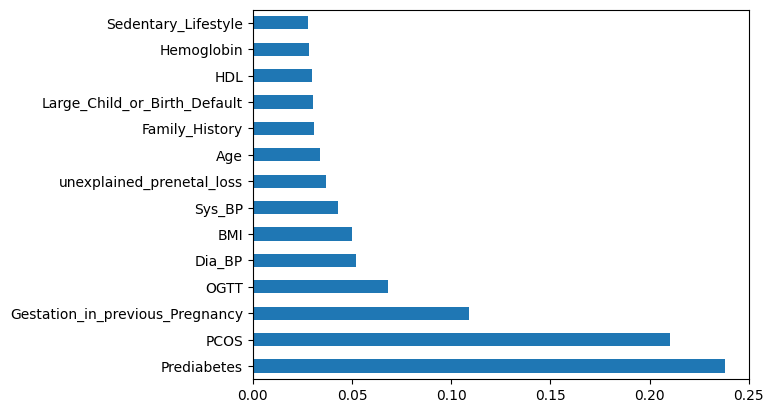

In [23]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [24]:
from scipy.stats import pearsonr

# Assuming 'df' is your DataFrame and 'Result' is the target column
target = 'Result'
correlation_results = {}

for column in df.columns:
    if column != target:
        # Calculate correlation and p-value
        corr, p_value = pearsonr(df[column], df[target])
        # Store the results
        correlation_results[column] = {'Correlation': corr, 'P-value': p_value}

# Convert the results to a DataFrame for better readability
correlation_df = pd.DataFrame(correlation_results).T

# Sort the DataFrame by the absolute value of correlation
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Display the DataFrame
print(correlation_df)


                                 Correlation        P-value
Case_Number                         0.766450   0.000000e+00
Prediabetes                         0.740059   0.000000e+00
PCOS                                0.693538   0.000000e+00
OGTT                                0.651343   0.000000e+00
Dia_BP                              0.579715  1.082792e-315
BMI                                 0.545745  7.782057e-273
Gestation_in_previous_Pregnancy     0.483954  2.001658e-206
Hemoglobin                          0.480545  3.819276e-203
Age                                 0.446500  2.402490e-172
Sys_BP                              0.358319  2.808906e-107
Large_Child_or_Birth_Default        0.347396  1.578702e-100
Family_History                      0.345066   4.011730e-99
unexplained_prenetal_loss           0.224166   2.157378e-41
No_of_Pregnancy                     0.206292   3.483597e-35
Sedentary_Lifestyle                 0.138116   1.768850e-16
HDL                                -0.42

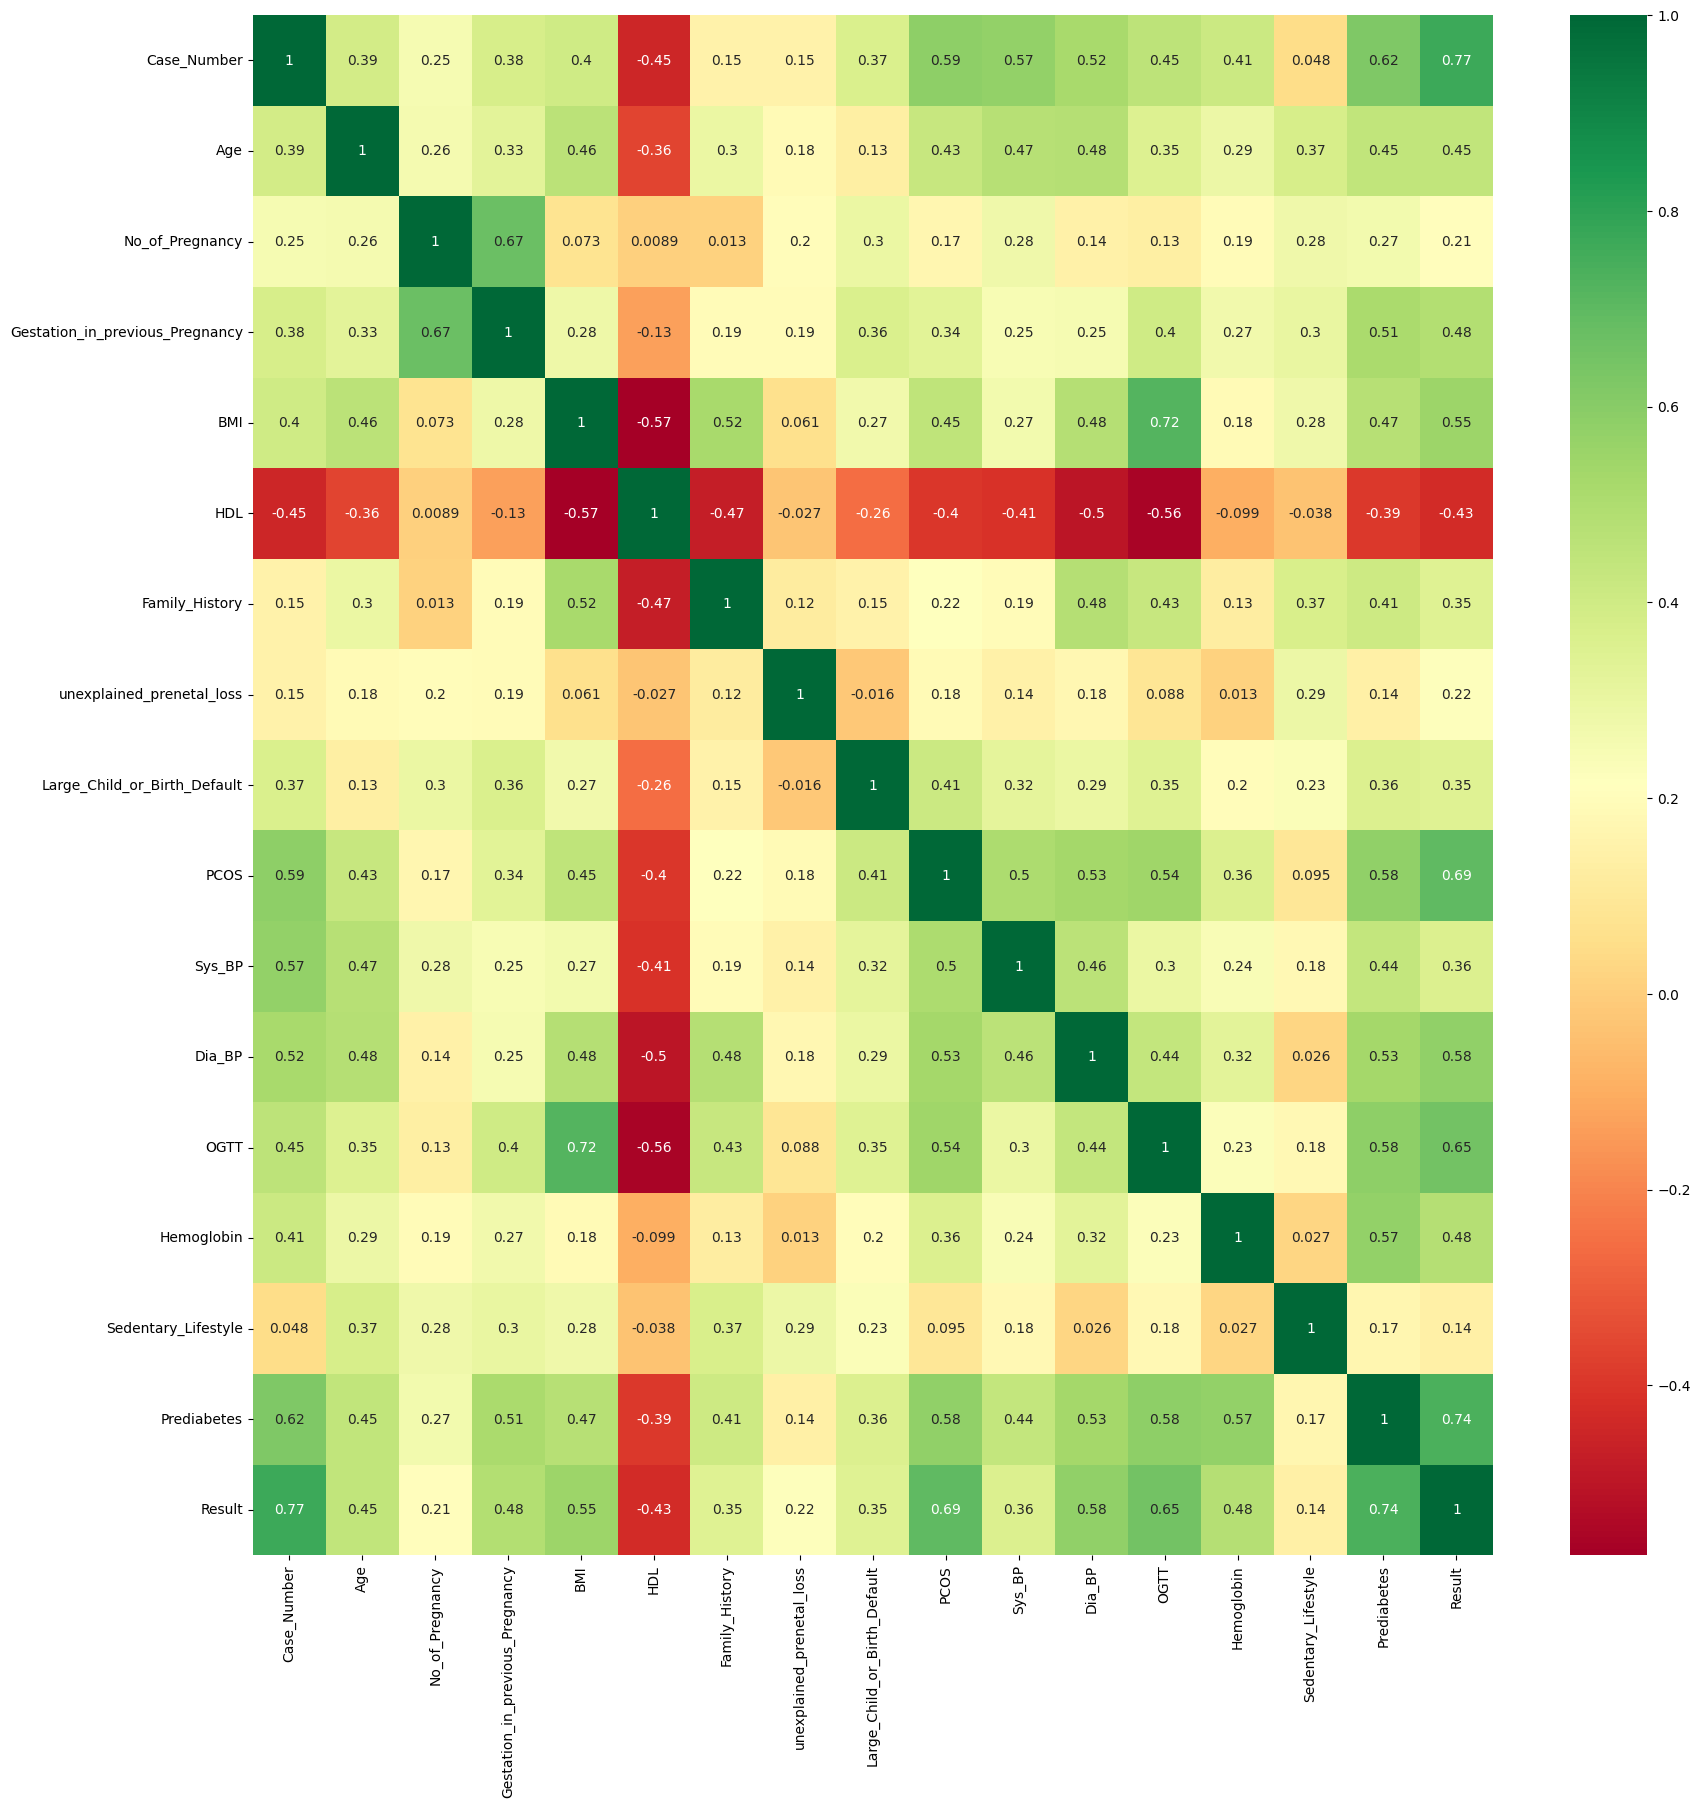

In [36]:
#Pearson
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

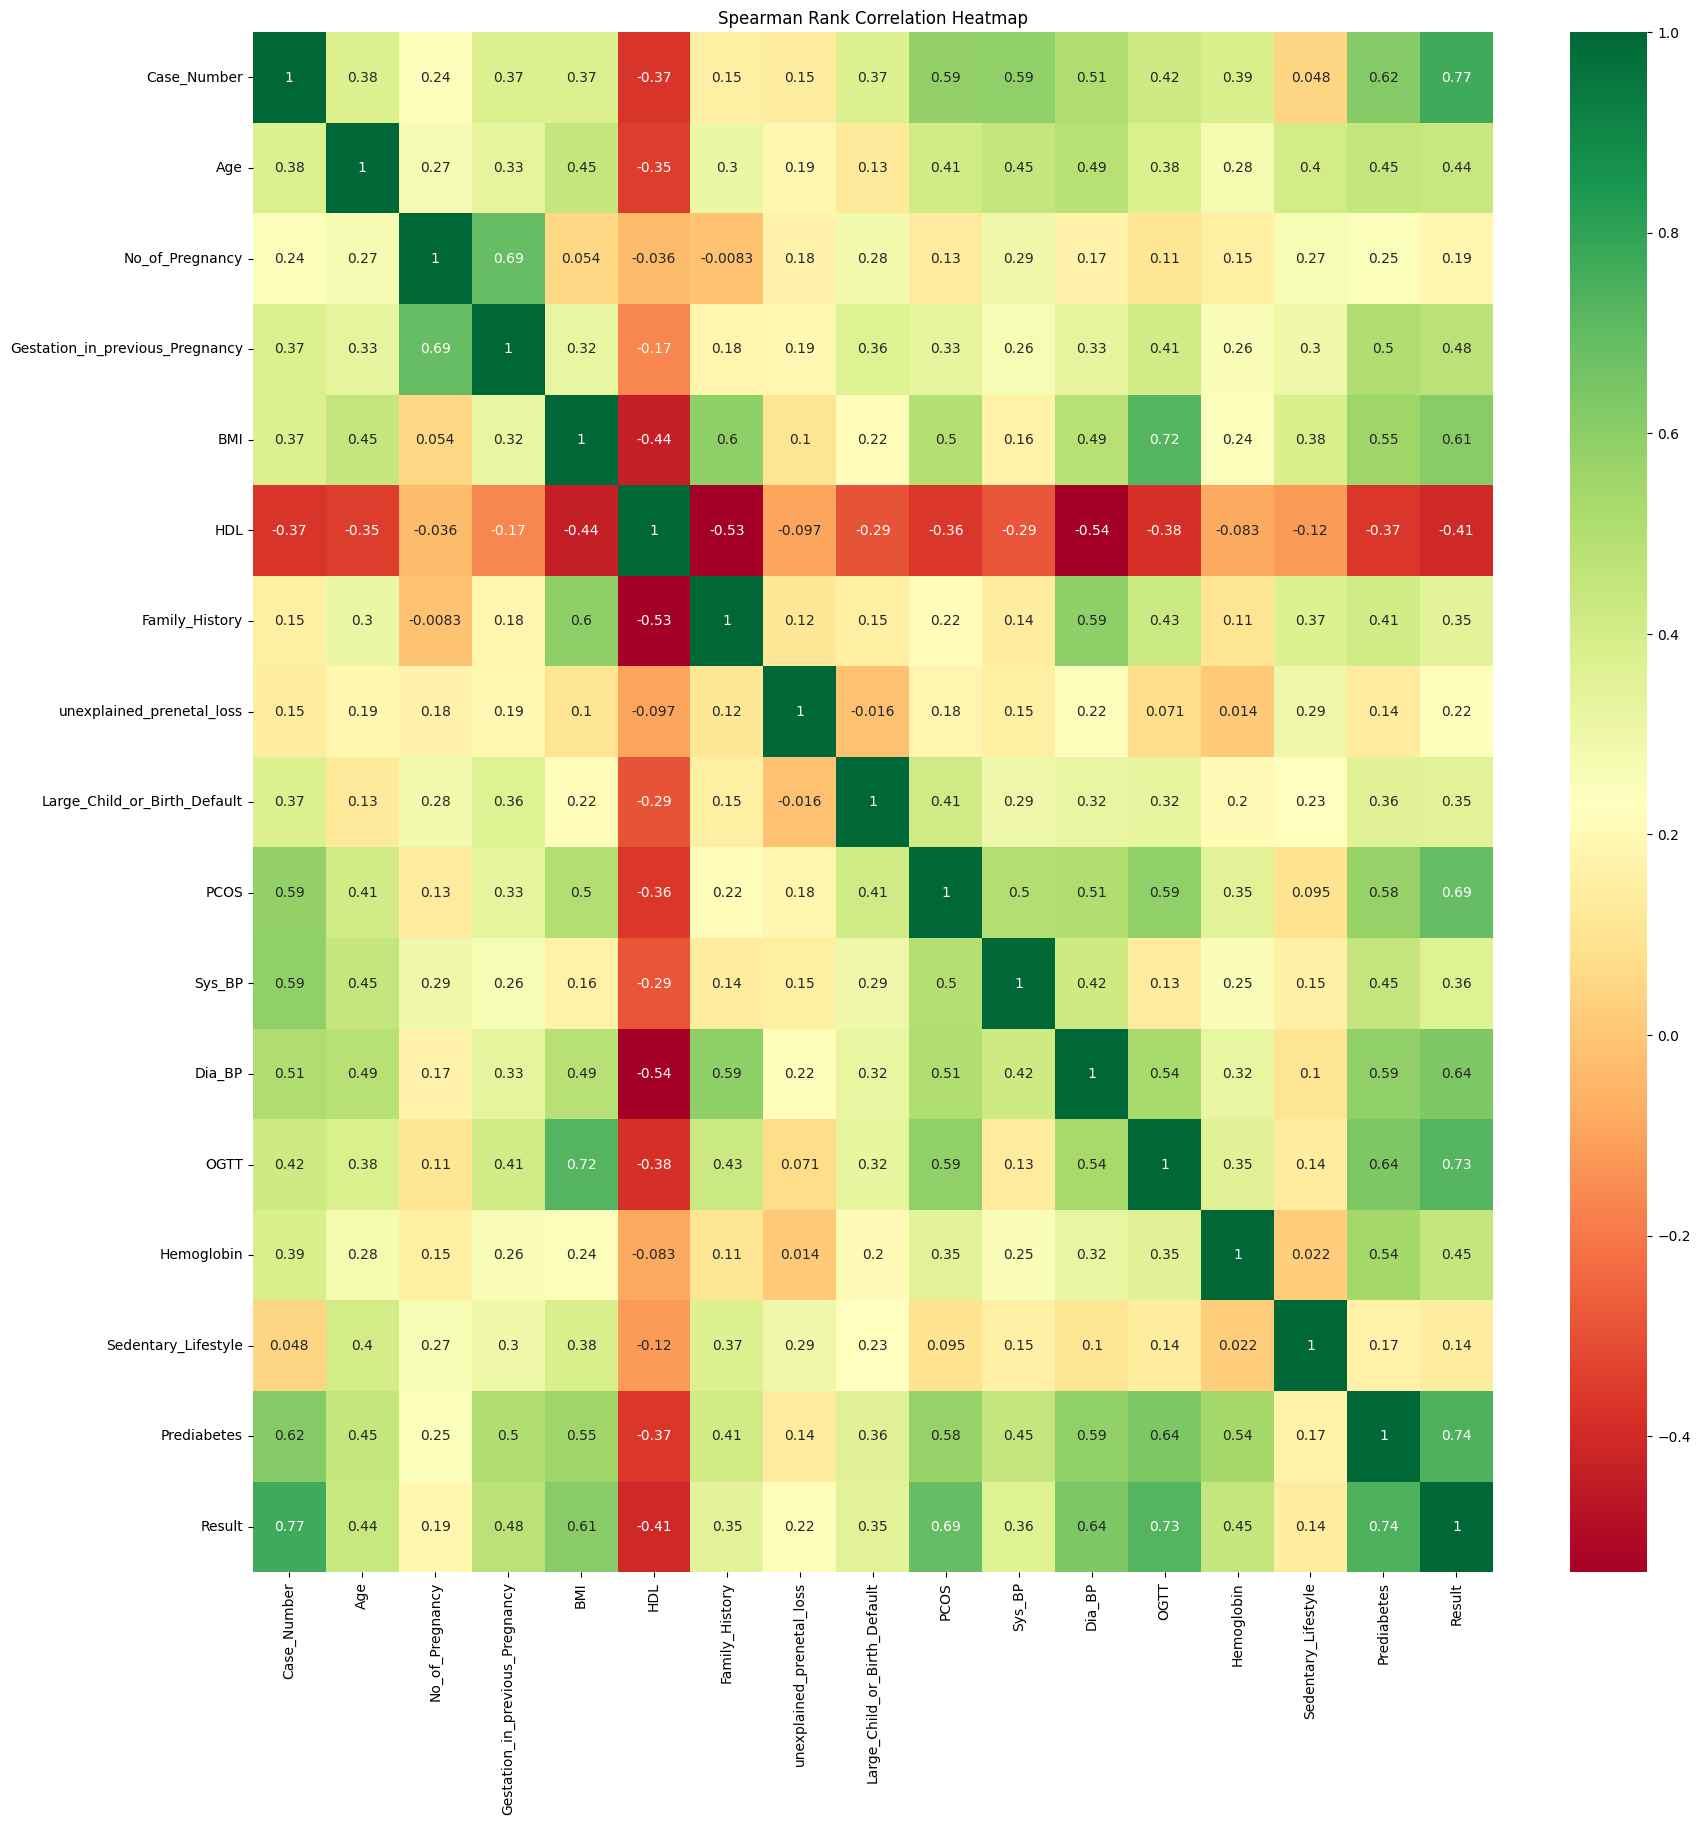

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Spearman's rank correlation instead of Pearson
corrmat = df.corr(method='spearman')  # Specify 'spearman' for Spearman's rank correlation

top_corr_features = corrmat.index

plt.figure(figsize=(20, 20))

# Plot heat map using Spearman's correlation
g = sns.heatmap(df[top_corr_features].corr(method='spearman'), annot=True, cmap="RdYlGn")
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

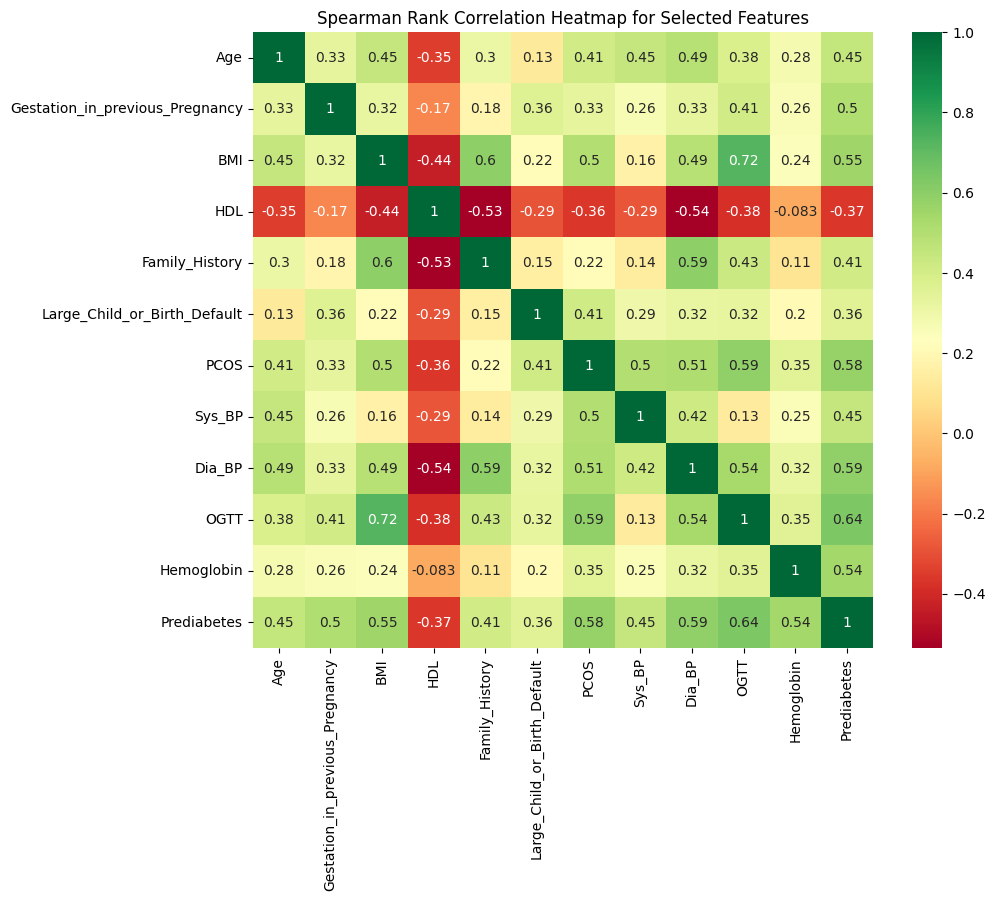

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Age', 'Gestation_in_previous_Pregnancy', 'BMI', 'HDL', 'Family_History',
                    'Large_Child_or_Birth_Default', 'PCOS', 'Sys_BP', 'Dia_BP', 'OGTT', 'Hemoglobin', 'Prediabetes']

# Get the Spearman's rank correlation matrix for the selected columns
corrmat = df[selected_columns].corr(method='spearman')  # Specify 'spearman' for Spearman's rank correlation

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.title('Spearman Rank Correlation Heatmap for Selected Features')
plt.show()


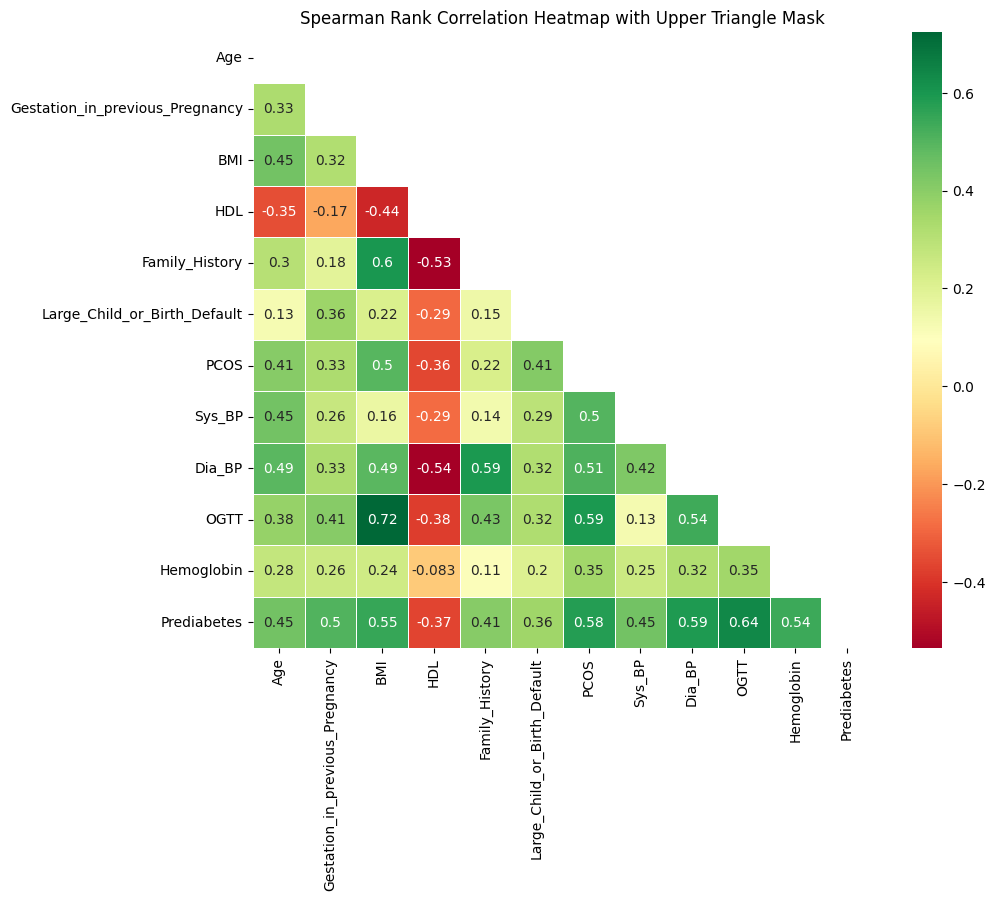

In [39]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

selected_columns = ['Age', 'Gestation_in_previous_Pregnancy', 'BMI', 'HDL', 'Family_History',
                    'Large_Child_or_Birth_Default', 'PCOS', 'Sys_BP', 'Dia_BP', 'OGTT', 'Hemoglobin', 'Prediabetes']

# Get the Spearman's rank correlation matrix for the selected columns
corrmat = df[selected_columns].corr(method='spearman')  # Specify 'spearman' for Spearman's rank correlation

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed

# Draw the heatmap with the mask
sns.heatmap(corrmat, mask=mask, annot=True, cmap="RdYlGn", linewidths=0.5)

plt.title('Spearman Rank Correlation Heatmap with Upper Triangle Mask')
plt.show()


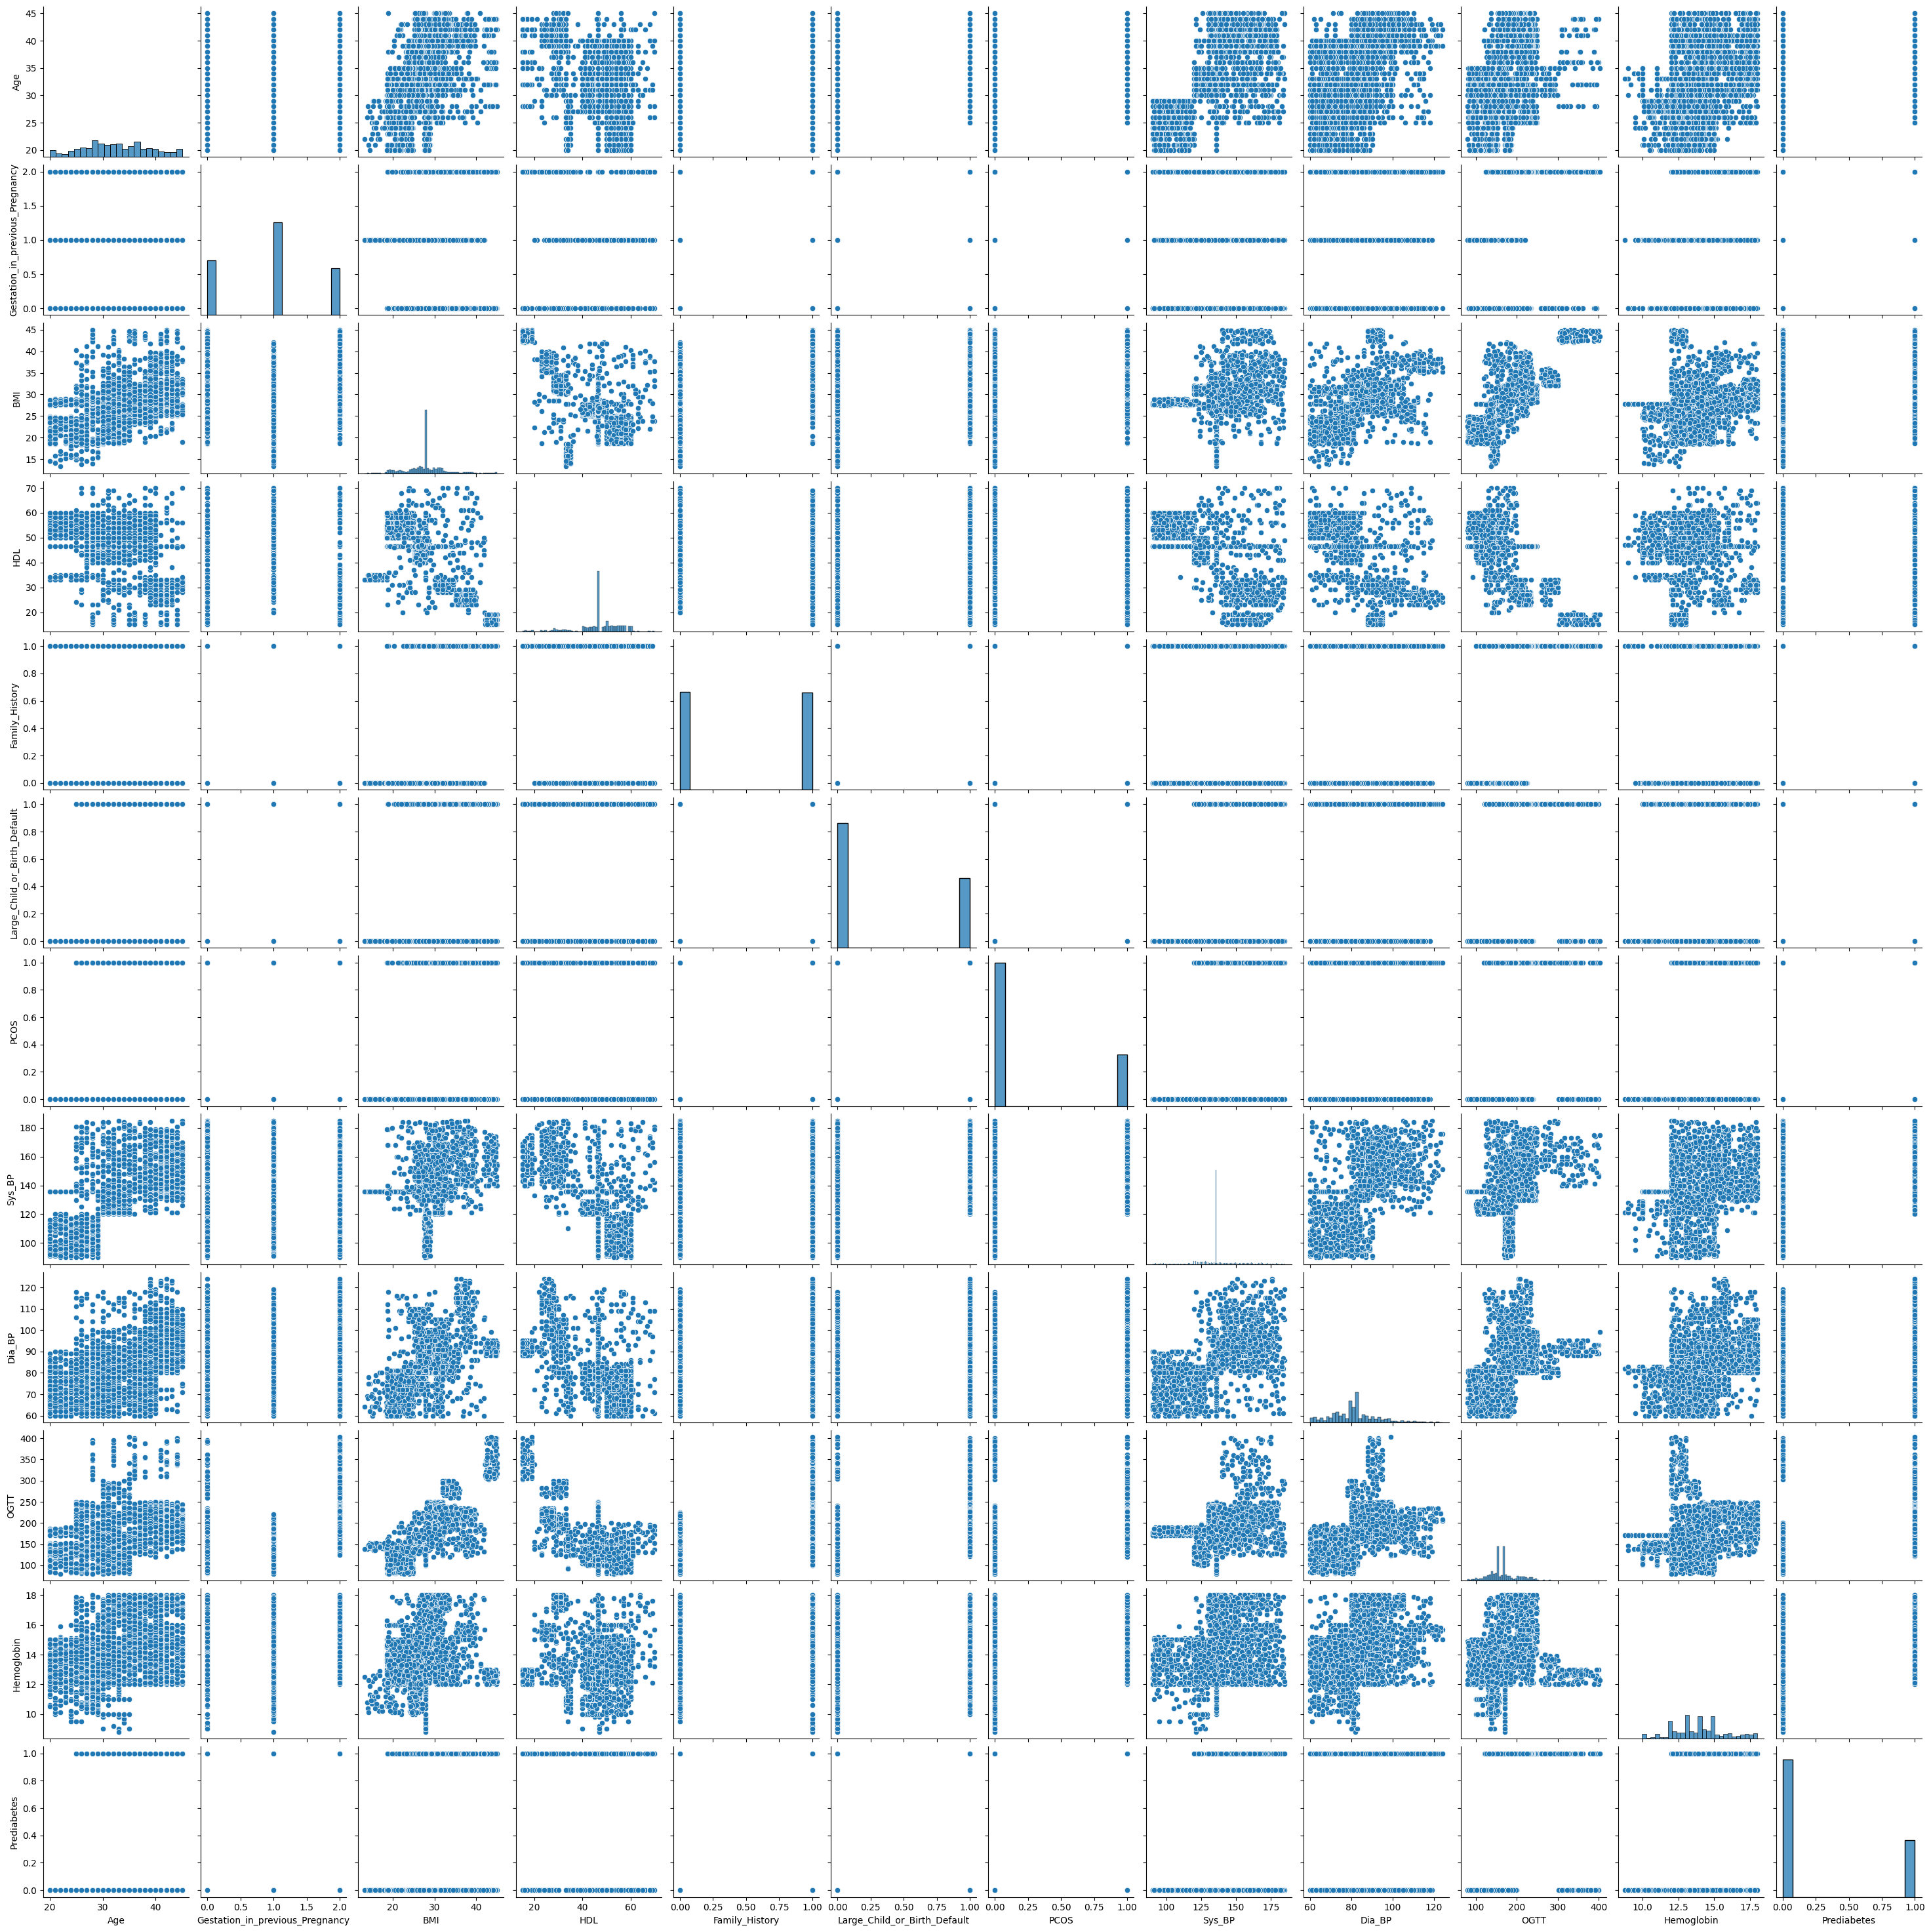

In [28]:
sns.pairplot(df[selected_columns])

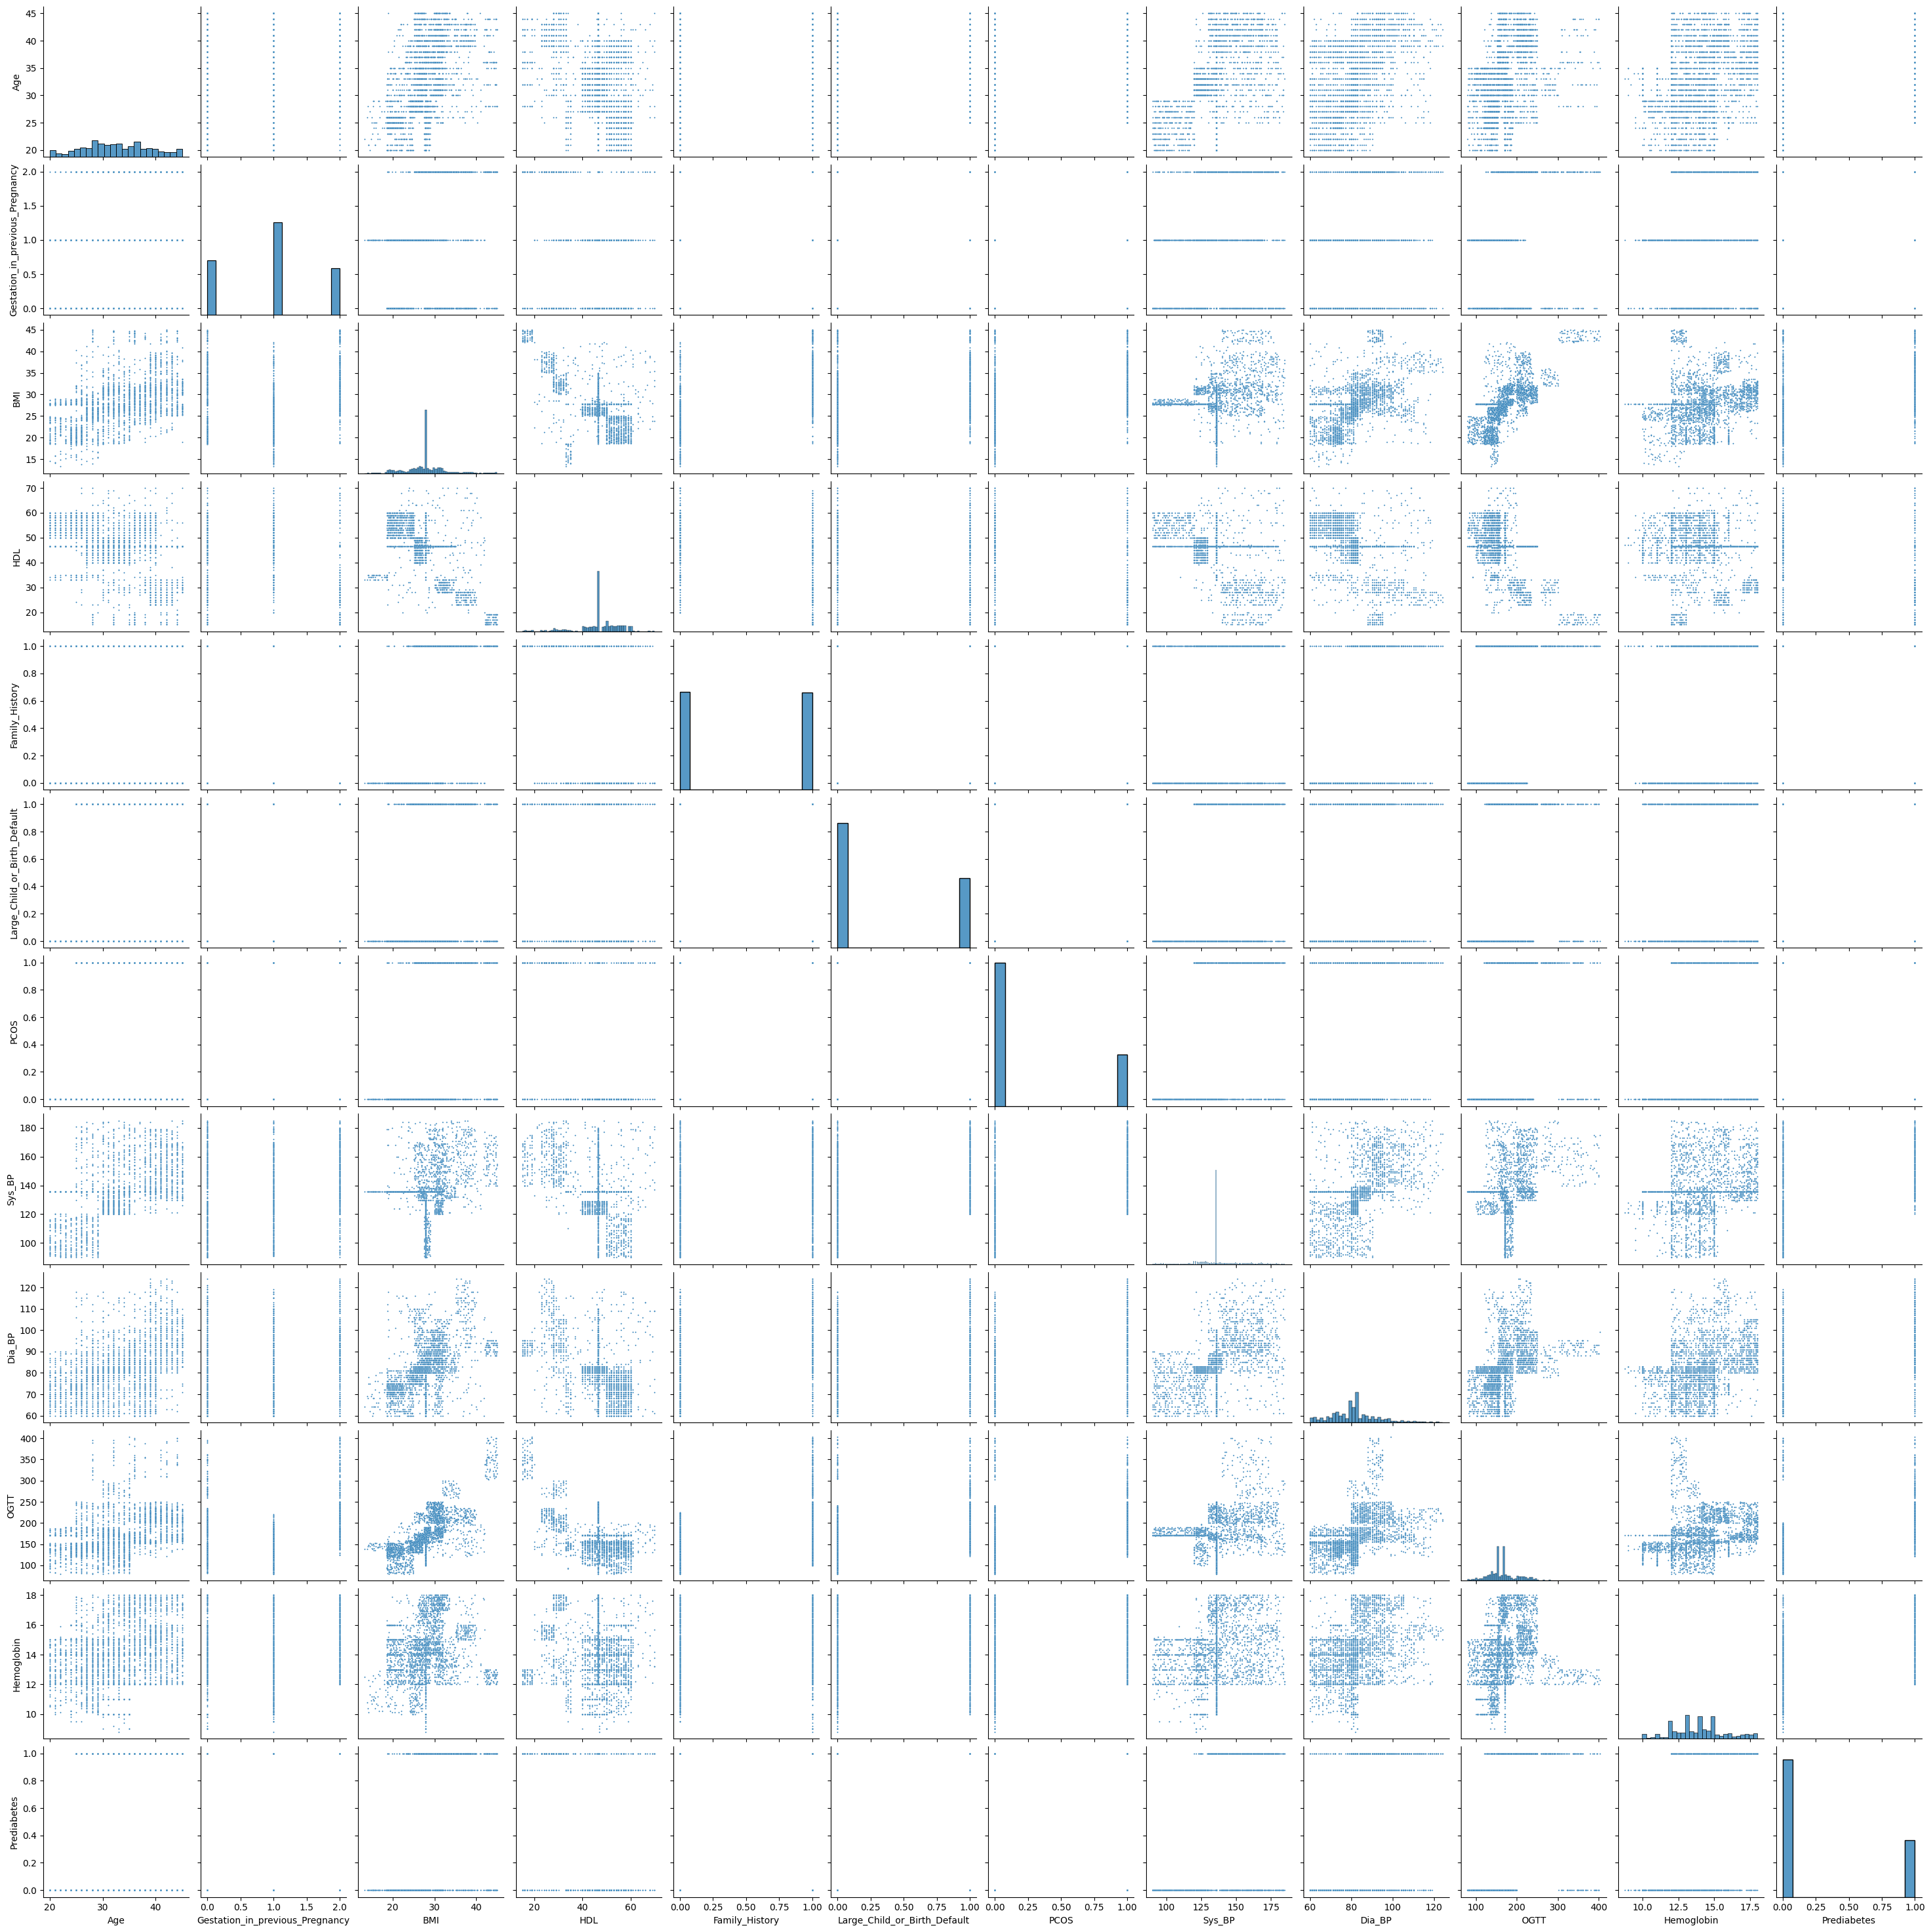

In [29]:
sns.pairplot(df[selected_columns], plot_kws={'s':2})  # Adjust 's' to control the point size
plt.show()


In [30]:
variances = df.var()
print("Variance of each feature:\n", variances)
top_10_features = variances.sort_values(ascending=False).head(12)
print("Top 10 features based on variance:\n", top_10_features)

Variance of each feature:
 Case_Number                        1.035762e+06
Age                                3.805788e+01
No_of_Pregnancy                    7.033122e-01
Gestation_in_previous_Pregnancy    5.217359e-01
BMI                                2.264019e+01
HDL                                8.352072e+01
Family_History                     2.500675e-01
unexplained_prenetal_loss          2.317929e-01
Large_Child_or_Birth_Default       2.298246e-01
PCOS                               1.946801e-01
Sys_BP                             2.669847e+02
Dia_BP                             1.294989e+02
OGTT                               1.981790e+03
Hemoglobin                         3.474380e+00
Sedentary_Lifestyle                2.475346e-01
Prediabetes                        2.072303e-01
Result                             2.377952e-01
dtype: float64
Top 10 features based on variance:
 Case_Number                        1.035762e+06
OGTT                               1.981790e+03
Sys_BP    

In [31]:
#For Regression
'''models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')'''

#For Classification
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

# Lists to store model names and their evaluation metrics
model_list = []
accuracy_list = []

# Iterate over models, train, predict and evaluate
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    train_accuracy, train_precision, train_recall, train_f1, train_conf_matrix = evaluate_classification_model(y_train, y_train_pred)
    test_accuracy, test_precision, test_recall, test_f1, test_conf_matrix = evaluate_classification_model(y_test, y_test_pred)

    # Print model performance
    print(f"{model_name}")
    model_list.append(model_name)

    print('Model performance for Training set')
    print(f"- Accuracy: {train_accuracy:.4f}")
    print(f"- Precision: {train_precision:.4f}")
    print(f"- Recall: {train_recall:.4f}")
    print(f"- F1 Score: {train_f1:.4f}")
    print('Confusion Matrix:\n', train_conf_matrix)

    print('----------------------------------')

    print('Model performance for Test set')
    print(f"- Accuracy: {test_accuracy:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")
    print('Confusion Matrix:\n', test_conf_matrix)
    accuracy_list.append(test_accuracy)

    print('=' * 35)
    print('\n')

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9784
- Precision: 0.9785
- Recall: 0.9784
- F1 Score: 0.9784
Confusion Matrix:
 [[1667   38]
 [  23 1092]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9702
- Precision: 0.9706
- Recall: 0.9702
- F1 Score: 0.9703
Confusion Matrix:
 [[434  14]
 [  7 250]]


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
Confusion Matrix:
 [[1705    0]
 [   0 1115]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9688
- Precision: 0.9688
- Recall: 0.9688
- F1 Score: 0.9688
Confusion Matrix:
 [[438  10]
 [ 12 245]]


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
Confusion Matrix:
 [[1705    0]
 [   0 1115]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9716
- Precision: 0.

### Results

In [32]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

Model Name  Accuracy
5        Extra Trees Classifier  0.973050
2      Random Forest Classifier  0.971631
4        CatBoosting Classifier  0.971631
0        K-Neighbors Classifier  0.970213
1                 Decision Tree  0.968794
3                 XGBClassifier  0.968794
7  Gradient Boosting Classifier  0.967376
6           AdaBoost Classifier  0.960284

## Just ExtraTrees Classifier


In [33]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 96.74


## Plot Confusion Matrix

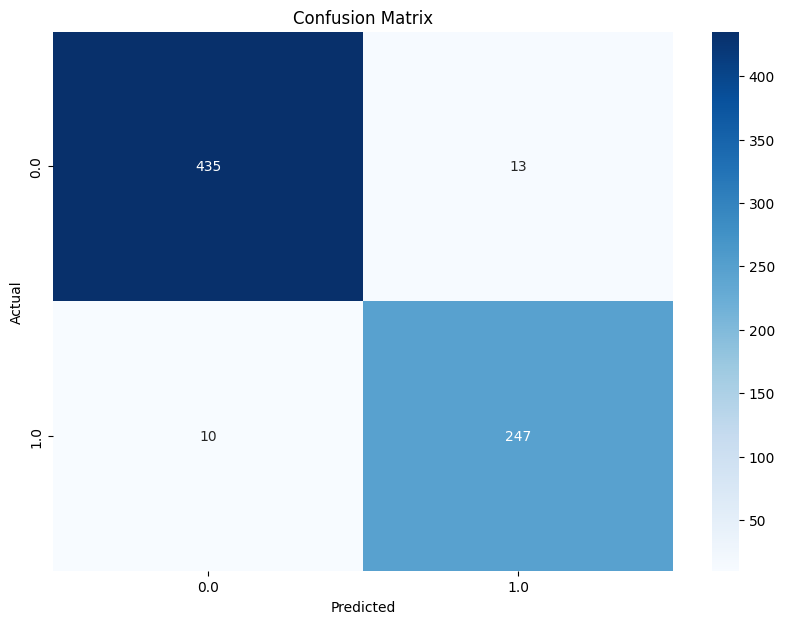

In [34]:
#For Regression
#plt.scatter(y_test,y_pred);
#plt.xlabel('Actual');
#plt.ylabel('Predicted');

from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


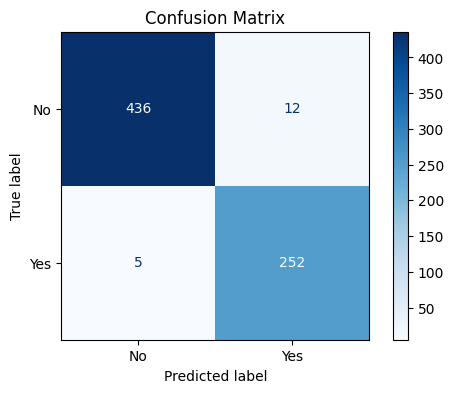

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay     #FOR SELECT K BEST   --->>  12 Features

# Confusion matrix values
true_negatives = 436
false_positives = 12
false_negatives = 5
true_positives = 252

# Create confusion matrix
confusion_matrix = np.array([[true_negatives, false_positives],
                             [false_negatives, true_positives]])

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix")
plt.show()


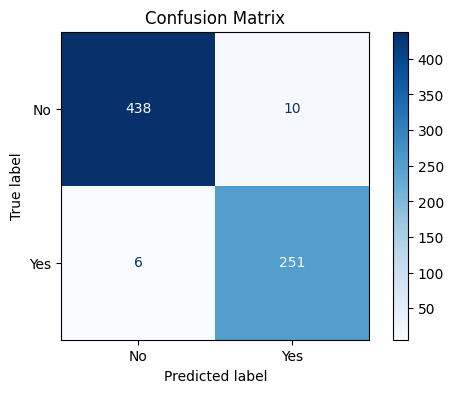

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay     #FOR SELECT K BEST   -->>  13 FEATURES

# Confusion matrix values
true_negatives = 438
false_positives = 10
false_negatives = 6
true_positives = 251

# Create confusion matrix
confusion_matrix = np.array([[true_negatives, false_positives],
                             [false_negatives, true_positives]])

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix")
plt.show()